In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/Transportation Project/'

/content/drive/My Drive/Transportation Project


In [ ]:
import pandas as pd
import matplotlib.ticker as ticker
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('q1final.csv')

In [ ]:
df

price_check_time  passenger  origin  destination  price  subsidy  \
0        1/4/2021 0:00          0       0            0  70000        0   
1       1/6/2021 12:11         10       0            0  60000    10000   
2       1/3/2021 20:15         15       0            0  65000    10000   
3       1/3/2021 20:11         15       0            0  75000    10000   
4       1/4/2021 14:46         22       0            0  75000    10000   
...                ...        ...     ...          ...    ...      ...   
26763   1/7/2021 10:19       3547       4            4  35000    10000   
26764   1/3/2021 16:26       4478       4            4  35000        0   
26765   1/6/2021 17:29       4333       4            4  45000    10000   
26766   1/4/2021 16:49       4594       4            4  60000    15000   
26767   1/5/2021 20:05       6062       4            4  35000    10000   

       distance  expected_duration        req_time  driver  status  
0        4174.0                8.0             NaN     NaN     NaN  
1        2851.0                8.0             NaN     NaN     NaN  
2        4386.0                8.0             NaN     NaN     NaN  
3        4488.0                9.0             NaN     NaN     NaN  
4        3683.0                8.0             NaN     NaN     NaN  
...         ...                ...             ...     ...     ...  
26763    1258.0                2.0  1/7/2021 10:21  1642.0     1.0  
26764     154.0                1.0  1/3/2021 16:34  1649.0     1.0  
26765    1088.0                3.0  1/6/2021 17:33  1676.0     1.0  
26766    2299.0                5.0  1/4/2021 16:50  1685.0     1.0  
26767    1717.0                5.0  1/5/2021 20:09  1728.0     1.0  

[26768 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_check_time   26768 non-null  object 
 1   passenger          26768 non-null  int64  
 2   origin             26768 non-null  int64  
 3   destination        26768 non-null  int64  
 4   price              26768 non-null  int64  
 5   subsidy            26768 non-null  int64  
 6   distance           26507 non-null  float64
 7   expected_duration  26498 non-null  float64
 8   req_time           16717 non-null  object 
 9   driver             14403 non-null  float64
 10  status             16717 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.2+ MB


In [ ]:
clean_df = df.__deepcopy__()
clean_df.driver.fillna(0,inplace = True)
clean_df.status.fillna(0,inplace = True)

clean_df['price_check_date'] = pd.to_datetime(clean_df.price_check_time).dt.date
clean_df['float_price_check_hour'] = pd.to_datetime(clean_df.price_check_time).dt.hour + pd.to_datetime(clean_df.price_check_time).dt.minute/60
clean_df['price_check_hour'] = pd.to_datetime(clean_df.price_check_time).dt.hour
clean_df['price_check_time'] = pd.to_datetime(clean_df.price_check_time).dt.time
clean_df['req_date'] = pd.to_datetime(clean_df.req_time).dt.date
clean_df['float_req_hour'] = pd.to_datetime(clean_df.req_time).dt.hour + pd.to_datetime(clean_df.req_time).dt.minute/60
clean_df['req_hour'] = pd.to_datetime(clean_df.req_time).dt.hour
clean_df['req_time'] = pd.to_datetime(clean_df.req_time).dt.time

clean_df['price_after_subsidy'] = clean_df['price'] - clean_df['subsidy']

mean_clean_df = clean_df.groupby(['origin','destination']).mean()[['distance','expected_duration']].reset_index().rename(columns = {'distance':'ave_distance','expected_duration':'ave_expected_duration'})
clean_df = clean_df.merge(mean_clean_df)
clean_df['distance'].fillna(clean_df['ave_distance'],inplace = True)
clean_df['expected_duration'].fillna(clean_df['ave_expected_duration'],inplace = True)

clean_df = clean_df[['price_check_date','float_price_check_hour','price_check_hour','price_check_time','passenger','origin','destination','price','subsidy','price_after_subsidy','distance','expected_duration','req_date','float_req_hour','req_hour','req_time','driver','status']]

In [ ]:
df2 = clean_df.__deepcopy__()

In [ ]:
df2

price_check_date  float_price_check_hour  price_check_hour  \
0           2021-01-04                0.000000                 0   
1           2021-01-06               12.183333                12   
2           2021-01-03               20.250000                20   
3           2021-01-03               20.183333                20   
4           2021-01-04               14.766667                14   
...                ...                     ...               ...   
26763       2021-01-07               10.316667                10   
26764       2021-01-03               16.433333                16   
26765       2021-01-06               17.483333                17   
26766       2021-01-04               16.816667                16   
26767       2021-01-05               20.083333                20   

      price_check_time  passenger  origin  destination  price  subsidy  \
0             00:00:00          0       0            0  70000        0   
1             12:11:00         10       0            0  60000    10000   
2             20:15:00         15       0            0  65000    10000   
3             20:11:00         15       0            0  75000    10000   
4             14:46:00         22       0            0  75000    10000   
...                ...        ...     ...          ...    ...      ...   
26763         10:19:00       3547       4            4  35000    10000   
26764         16:26:00       4478       4            4  35000        0   
26765         17:29:00       4333       4            4  45000    10000   
26766         16:49:00       4594       4            4  60000    15000   
26767         20:05:00       6062       4            4  35000    10000   

       price_after_subsidy  distance  expected_duration    req_date  \
0                    70000    4174.0                8.0         NaT   
1                    50000    2851.0                8.0         NaT   
2                    55000    4386.0                8.0         NaT   
3                    65000    4488.0                9.0         NaT   
4                    65000    3683.0                8.0         NaT   
...                    ...       ...                ...         ...   
26763                25000    1258.0                2.0  2021-01-07   
26764                35000     154.0                1.0  2021-01-03   
26765                35000    1088.0                3.0  2021-01-06   
26766                45000    2299.0                5.0  2021-01-04   
26767                25000    1717.0                5.0  2021-01-05   

       float_req_hour  req_hour  req_time  driver  status  
0                 NaN       NaN       NaT     0.0     0.0  
1                 NaN       NaN       NaT     0.0     0.0  
2                 NaN       NaN       NaT     0.0     0.0  
3                 NaN       NaN       NaT     0.0     0.0  
4                 NaN       NaN       NaT     0.0     0.0  
...               ...       ...       ...     ...     ...  
26763       10.350000      10.0  10:21:00  1642.0     1.0  
26764       16.566667      16.0  16:34:00  1649.0     1.0  
26765       17.550000      17.0  17:33:00  1676.0     1.0  
26766       16.833333      16.0  16:50:00  1685.0     1.0  
26767       20.150000      20.0  20:09:00  1728.0     1.0  

[26768 rows x 18 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26768 entries, 0 to 26767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_check_date        26768 non-null  object 
 1   float_price_check_hour  26768 non-null  float64
 2   price_check_hour        26768 non-null  int64  
 3   price_check_time        26768 non-null  object 
 4   passenger               26768 non-null  int64  
 5   origin                  26768 non-null  int64  
 6   destination             26768 non-null  int64  
 7   price                   26768 non-null  int64  
 8   subsidy                 26768 non-null  int64  
 9   price_after_subsidy     26768 non-null  int64  
 10  distance                26768 non-null  float64
 11  expected_duration       26768 non-null  float64
 12  req_date                16717 non-null  object 
 13  float_req_hour          16717 non-null  float64
 14  req_hour                16717 non-null

In [ ]:
df2

price_check_date  float_price_check_hour  price_check_hour  \
0           2021-01-04                0.000000                 0   
1           2021-01-06               12.183333                12   
2           2021-01-03               20.250000                20   
3           2021-01-03               20.183333                20   
4           2021-01-04               14.766667                14   
...                ...                     ...               ...   
26763       2021-01-07               10.316667                10   
26764       2021-01-03               16.433333                16   
26765       2021-01-06               17.483333                17   
26766       2021-01-04               16.816667                16   
26767       2021-01-05               20.083333                20   

      price_check_time  passenger  origin  destination  price  subsidy  \
0             00:00:00          0       0            0  70000        0   
1             12:11:00         10       0            0  60000    10000   
2             20:15:00         15       0            0  65000    10000   
3             20:11:00         15       0            0  75000    10000   
4             14:46:00         22       0            0  75000    10000   
...                ...        ...     ...          ...    ...      ...   
26763         10:19:00       3547       4            4  35000    10000   
26764         16:26:00       4478       4            4  35000        0   
26765         17:29:00       4333       4            4  45000    10000   
26766         16:49:00       4594       4            4  60000    15000   
26767         20:05:00       6062       4            4  35000    10000   

       price_after_subsidy  distance  expected_duration    req_date  \
0                    70000    4174.0                8.0         NaT   
1                    50000    2851.0                8.0         NaT   
2                    55000    4386.0                8.0         NaT   
3                    65000    4488.0                9.0         NaT   
4                    65000    3683.0                8.0         NaT   
...                    ...       ...                ...         ...   
26763                25000    1258.0                2.0  2021-01-07   
26764                35000     154.0                1.0  2021-01-03   
26765                35000    1088.0                3.0  2021-01-06   
26766                45000    2299.0                5.0  2021-01-04   
26767                25000    1717.0                5.0  2021-01-05   

       float_req_hour  req_hour  req_time  driver  status  
0                 NaN       NaN       NaT     0.0     0.0  
1                 NaN       NaN       NaT     0.0     0.0  
2                 NaN       NaN       NaT     0.0     0.0  
3                 NaN       NaN       NaT     0.0     0.0  
4                 NaN       NaN       NaT     0.0     0.0  
...               ...       ...       ...     ...     ...  
26763       10.350000      10.0  10:21:00  1642.0     1.0  
26764       16.566667      16.0  16:34:00  1649.0     1.0  
26765       17.550000      17.0  17:33:00  1676.0     1.0  
26766       16.833333      16.0  16:50:00  1685.0     1.0  
26767       20.150000      20.0  20:09:00  1728.0     1.0  

[26768 rows x 18 columns]

In [ ]:
df3 = df2.copy()
print(df3.head().T)

                                 0           1           2           3  \
price_check_date        2021-01-04  2021-01-06  2021-01-03  2021-01-03   
float_price_check_hour         0.0   12.183333       20.25   20.183333   
price_check_hour                 0          12          20          20   
price_check_time          00:00:00    12:11:00    20:15:00    20:11:00   
passenger                        0          10          15          15   
origin                           0           0           0           0   
destination                      0           0           0           0   
price                        70000       60000       65000       75000   
subsidy                          0       10000       10000       10000   
price_after_subsidy          70000       50000       55000       65000   
distance                    4174.0      2851.0      4386.0      4488.0   
expected_duration              8.0         8.0         8.0         9.0   
req_date                       NaT    

In [ ]:
print(df3.nunique())

price_check_date             8
float_price_check_hour    1353
price_check_hour            24
price_check_time          1353
passenger                 6784
origin                       5
destination                  5
price                       70
subsidy                     24
price_after_subsidy         66
distance                  6797
expected_duration           56
req_date                     9
float_req_hour            1310
req_hour                    24
req_time                  1310
driver                    1753
status                       5
dtype: int64


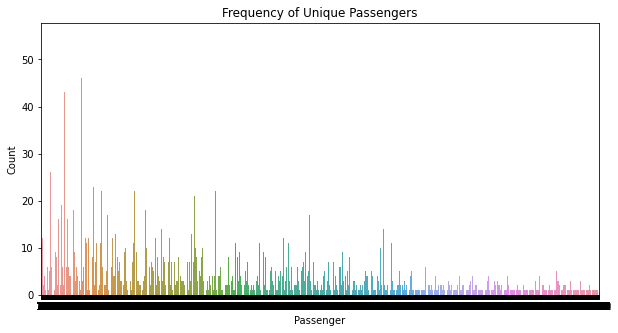

In [ ]:
passenger = df3['passenger'].tolist()
# unique passengers
unique_passenger = set(passenger)
count_unique_passenger = []
for i in unique_passenger:
    count_unique_passenger.append(passenger.count(i))
# plot a chart x axis is unique_passenger and y axis is count_unique_passenger
plt.figure(figsize=(10, 5))
sns.barplot(x=list(unique_passenger), y=count_unique_passenger)
plt.xlabel('Passenger')
plt.ylabel('Count')
plt.title('Frequency of Unique Passengers')
plt.show()

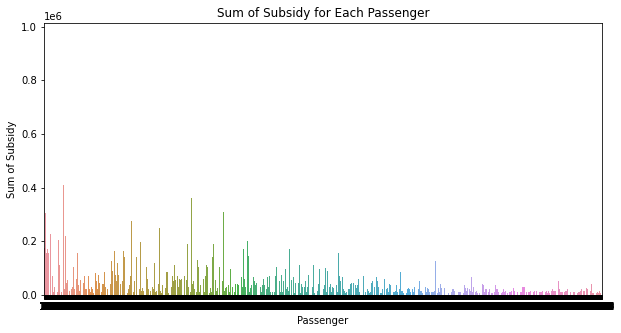

In [ ]:
# create a list from subsidy
subsidy = df3['subsidy'].tolist()
sum_subsidy_passenger = []
# sum of subsidy for each passenger
for i in unique_passenger:
    sum_subsidy_passenger.append(sum([subsidy[j] for j in range (len(subsidy)) if passenger[j] == i]))

# plot a chart x axis is unique_passenger and y axis is sum_subsidy_passenger
plt.figure(figsize=(10, 5))
sns.barplot(x=list(unique_passenger), y=sum_subsidy_passenger)
plt.xlabel('Passenger')
plt.ylabel('Sum of Subsidy')
plt.title('Sum of Subsidy for Each Passenger')
plt.show()

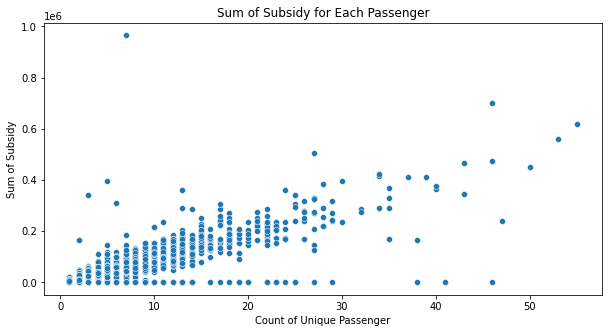

In [ ]:
# plot a scatter chart x axis is count_unique_passenger and y axis is sum_subsidy_passenger
plt.figure(figsize=(10, 5))
sns.scatterplot(x=count_unique_passenger, y=sum_subsidy_passenger)
plt.xlabel('Count of Unique Passenger')
plt.ylabel('Sum of Subsidy')
plt.title('Sum of Subsidy for Each Passenger')
plt.show()

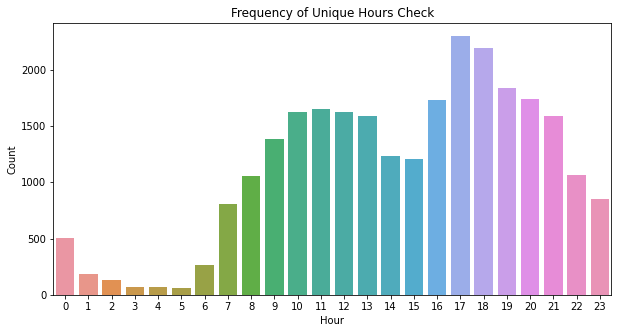

In [ ]:
# create a list from hour_check
hour_check = df3['price_check_hour'].tolist()
# unique hours
unique_hour = set(hour_check)
# sort unique hours
unique_hour = sorted(unique_hour)
count_unique_hour = []
for i in unique_hour:
    count_unique_hour.append(hour_check.count(i))
# plot a chart x axis is unique_hour and y axis is count_unique_hour
plt.figure(figsize=(10, 5))
sns.barplot(x=list(unique_hour), y=count_unique_hour,order=list(sorted(int(x) for x in list(unique_hour))))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Frequency of Unique Hours Check')
plt.show()

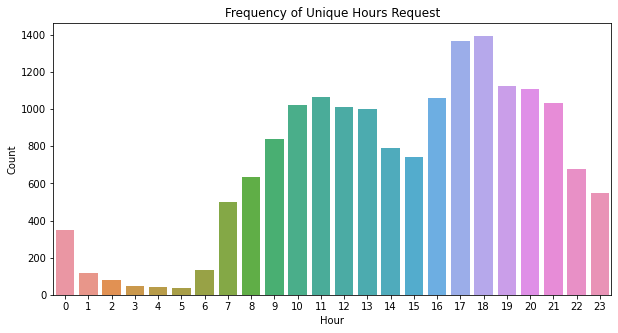

In [ ]:
# create a list from hour_req if hour_req is not Nan
hour_req = df3['req_hour'].tolist()
hour_req = [i for i in hour_req if i !=  np.nan]
# unique hours
unique_hour_req = set(hour_req)
# sort unique hours
unique_hour_req = sorted(unique_hour_req)
count_unique_hour_req = []
for i in unique_hour_req:
    count_unique_hour_req.append(hour_req.count(i))
# plot a chart x axis is unique_hour_req and y axis is count_unique_hour_req
plt.figure(figsize=(10, 5))
sns.barplot(x=list(unique_hour_req), y=count_unique_hour_req,order=list(sorted(int(x) for x in list(unique_hour))))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Frequency of Unique Hours Request')
plt.show()

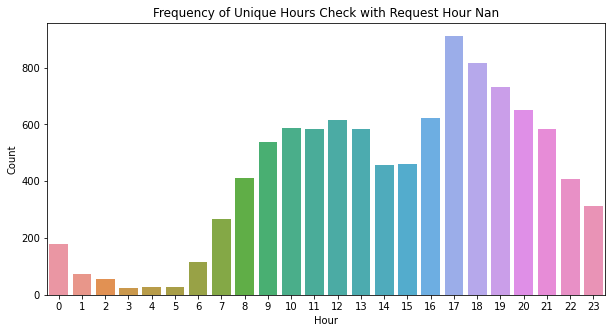

In [ ]:
hour_req_with_Nan = df3['req_hour'].tolist()
# find index of Nan
index_Nan = [i for i in range(len(hour_req_with_Nan)) if str(hour_req_with_Nan[i]) == 'nan']
# create a list from hour_check which hour_req is Nan
hour_check_Nan = [hour_check[i] for i in index_Nan]
# unique hours
unique_hour_check_Nan = set(hour_check_Nan)
# sort unique hours
unique_hour_check_Nan = sorted(unique_hour_check_Nan)
count_unique_hour_check_Nan = []
for i in unique_hour_check_Nan:
    count_unique_hour_check_Nan.append(hour_check_Nan.count(i))
# plot a chart x axis is unique_hour_check_Nan and y axis is count_unique_hour_check_Nan
plt.figure(figsize=(10, 5))
sns.barplot(x=list(unique_hour_check_Nan), y=count_unique_hour_check_Nan,order=list(sorted(int(x) for x in list(unique_hour))))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Frequency of Unique Hours Check with Request Hour Nan')
plt.show()

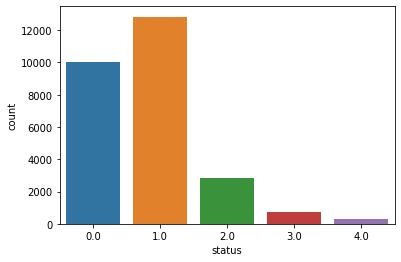

In [ ]:
# plot the count of status
sns.countplot(x='status', data=df3)
plt.show()

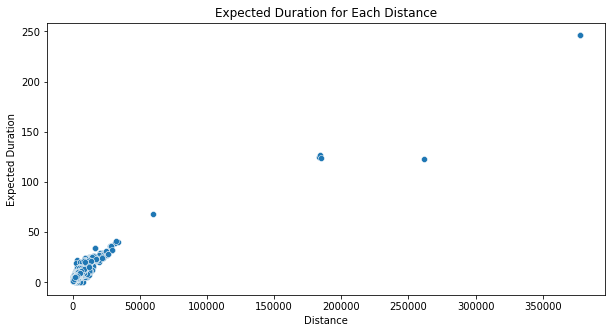

In [ ]:
# create a list of distance
distance = df3['distance'].tolist()
# create a list of expected_duration
expected_duration = df3['expected_duration'].tolist()
# plot a scatter chart x axis is distance and y axis is expected_duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x=distance, y=expected_duration)
plt.xlabel('Distance')
plt.ylabel('Expected Duration')
plt.title('Expected Duration for Each Distance')
plt.show()


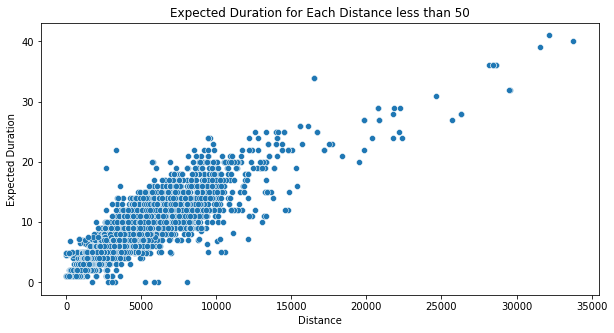

In [ ]:
# expected_duration less than 50
expected_duration_less_50 = [i for i in expected_duration if i < 50]
# distance less than 50000
distance_less_50000 = [distance[i] for i in range(len(distance)) if expected_duration[i] < 50]
# plot a scatter chart x axis is distance_less_50000 and y axis is expected_duration_less_50
plt.figure(figsize=(10, 5))
sns.scatterplot(x=distance_less_50000, y=expected_duration_less_50)
plt.xlabel('Distance')
plt.ylabel('Expected Duration')
plt.title('Expected Duration for Each Distance less than 50')
plt.show()

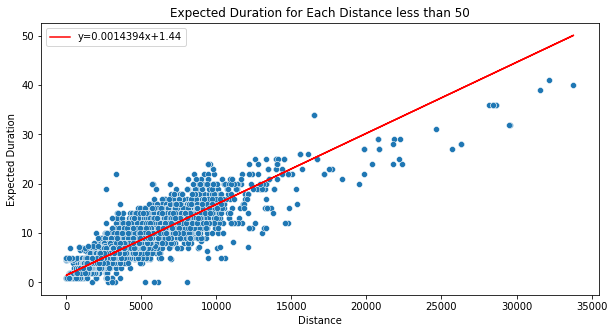

In [ ]:
# fit a linear line in the above chart
slope, intercept, r_value, p_value, std_err = stats.linregress(distance_less_50000, expected_duration_less_50)
line = [slope*i+intercept for i in distance_less_50000]
plt.figure(figsize=(10, 5))
sns.scatterplot(x=distance_less_50000, y=expected_duration_less_50)
plt.plot(distance_less_50000, line, 'r', label='y={:.7f}x+{:.2f}'.format(slope, intercept))
plt.xlabel('Distance')
plt.ylabel('Expected Duration')
plt.title('Expected Duration for Each Distance less than 50')
plt.legend()
plt.show()

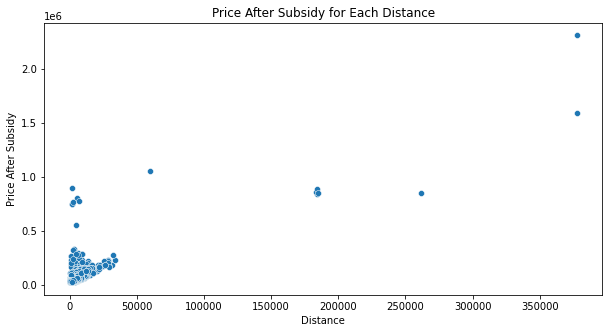

In [ ]:
# create a list of distance
distance = df3['distance'].tolist()
# create a list of price_after_subsidy
price_after_subsidy = df3['price_after_subsidy'].tolist()
# plot a scatter chart x axis is distance and y axis is price_after_subsidy
plt.figure(figsize=(10, 5))
sns.scatterplot(x=distance, y=price_after_subsidy)
plt.xlabel('Distance')
plt.ylabel('Price After Subsidy')
plt.title('Price After Subsidy for Each Distance')
plt.show()

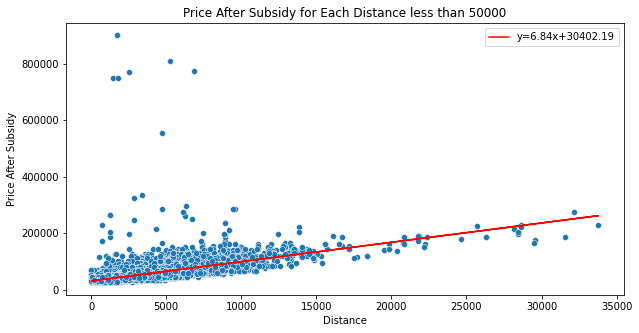

In [ ]:
# distance less than 50000
distance_less_50000 = [distance[i] for i in range(len(distance)) if distance[i] < 50000]
# price_after_subsidy less than 500000
price_after_subsidy_less_500000 = [price_after_subsidy[i] for i in range(len(price_after_subsidy)) if distance[i] < 50000]
# plot a scatter chart x axis is distance_less_50000 and y axis is price_after_subsidy_less_500000
# fit a linear line in the above chart
slope, intercept, r_value, p_value, std_err = stats.linregress(distance_less_50000, price_after_subsidy_less_500000)
line = [slope*i+intercept for i in distance_less_50000]
plt.figure(figsize=(10, 5))
sns.scatterplot(x=distance_less_50000, y=price_after_subsidy_less_500000)
plt.plot(distance_less_50000, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))
plt.xlabel('Distance')
plt.ylabel('Price After Subsidy')
plt.title('Price After Subsidy for Each Distance less than 50000')
plt.legend()
plt.show()

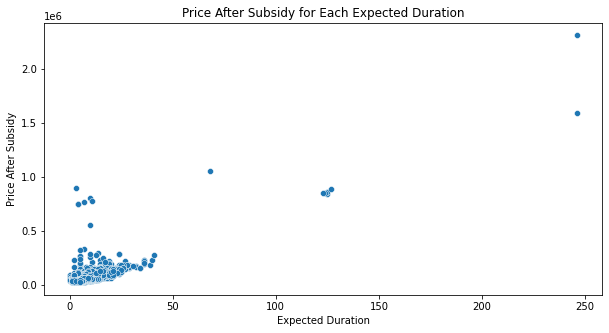

In [ ]:
# plot a scatter chart x axis is Expected Duration and y axis is price_after_subsidy
plt.figure(figsize=(10, 5))
sns.scatterplot(x=expected_duration, y=price_after_subsidy)
plt.xlabel('Expected Duration')
plt.ylabel('Price After Subsidy')
plt.title('Price After Subsidy for Each Expected Duration')
plt.show()

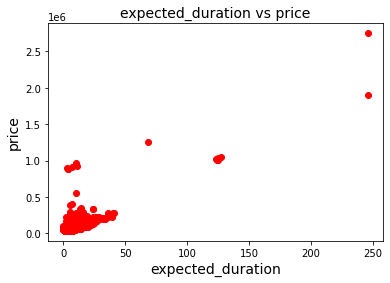

In [ ]:
# Create a list from expected_duration column values less than 50
expected_duration_new = [i for i in df3['expected_duration'] if i < 50]
# Index list from expected_duration column values less than 50
expected_duration_index = [i for i in df3.index if df3['expected_duration'][i] < 50]
# Create a list from price column with index from expected_duration_index
price_new = [df3['price'][i] for i in expected_duration_index]
# scatter plot for expected_duration ,price
expected_duration = df3['expected_duration'].tolist()
price = df3['price'].tolist()
plt.scatter(expected_duration, price, color='red')
plt.title('expected_duration vs price', fontsize=14)
plt.xlabel('expected_duration', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.show()

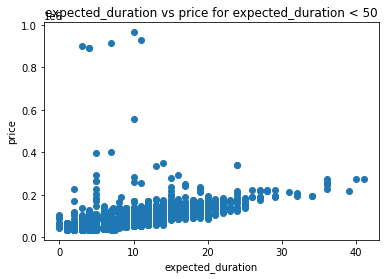

In [ ]:
# scatter plot for expected_duration_new ,price_new
plt.scatter(expected_duration_new, price_new)
plt.xlabel('expected_duration')
plt.ylabel('price')
plt.title('expected_duration vs price for expected_duration < 50')
plt.show()

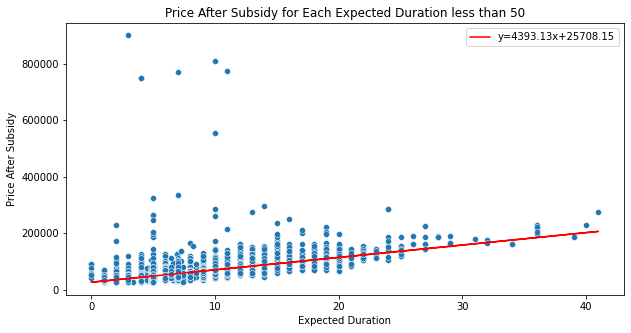

In [ ]:
# expected_duration less than 50
expected_duration_less_50 = [i for i in expected_duration if i < 50]
# price_after_subsidy less than 500000
price_after_subsidy_less_500000 = [price_after_subsidy[i] for i in range(len(price_after_subsidy)) if expected_duration[i] < 50]
# plot a scatter chart x axis is expected_duration_less_50 and y axis is price_after_subsidy_less_500000
# fit a linear line in the above chart
slope, intercept, r_value, p_value, std_err = stats.linregress(expected_duration_less_50, price_after_subsidy_less_500000)
line = [slope*i+intercept for i in expected_duration_less_50]
plt.figure(figsize=(10, 5))
sns.scatterplot(x=expected_duration_less_50, y=price_after_subsidy_less_500000)
plt.plot(expected_duration_less_50, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))
plt.xlabel('Expected Duration')
plt.ylabel('Price After Subsidy')
plt.title('Price After Subsidy for Each Expected Duration less than 50')
plt.legend()
plt.show()

In [ ]:
# create list from price
price = df3['price'].tolist()
# expected_duration less than 50
expected_duration_less_50 = [i for i in expected_duration if i < 50]
# price_after_subsidy less than 500000
price_after_subsidy_less_500000 = [price[i] for i in range(len(price)) if expected_duration[i] < 50]
# price less than 500000
price_less_500000 = [price_after_subsidy[i] for i in range(len(price_after_subsidy)) if expected_duration[i] < 50]
# distance less than 50000
distance_less_50000 = [distance[i] for i in range(len(distance)) if expected_duration[i] < 50]
# create df5 with distance_less_50000, expected_duration_less_50, price_less_500000,price_after_subsidy_less_500000
df5 = pd.DataFrame({'distance':distance_less_50000, 'expected_duration':expected_duration_less_50, 'price':price_less_500000, 'price_after_subsidy':price_after_subsidy_less_500000})
X1 = df5['distance']
X2 = df5['expected_duration']
Y1 = df5['price']
Y2 = df5['price_after_subsidy']
# split test and train data
from sklearn.model_selection import train_test_split
X1_train, X1_test, X2_train, X2_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X1, X2, Y1, Y2, test_size=0.2, random_state=0)
# Model1 - Linear Regression for X1,Y1
# Model2 - Linear Regression for X2,Y1
# Model3 - Linear Regression for X1,Y2
# Model4 - Linear Regression for X2,Y2
# Model5 - Linear Regression for X1,X2,Y1
# Model6 - Linear Regression for X1,X2,Y2
# Model1
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X1_train.values.reshape(-1, 1), Y1_train)
# Model2

regressor2 = LinearRegression()
regressor2.fit(X2_train.values.reshape(-1, 1), Y1_train)
# Model3

regressor3 = LinearRegression()
regressor3.fit(X1_train.values.reshape(-1, 1), Y2_train)
# Model4

regressor4 = LinearRegression()
regressor4.fit(X2_train.values.reshape(-1, 1), Y2_train)
# Model5

regressor5 = LinearRegression()
regressor5.fit(X1_train.values.reshape(-1, 1), Y1_train)
# Model6

regressor6 = LinearRegression()
regressor6.fit(X1_train.values.reshape(-1, 1), Y2_train)

# MSE, R2, R2-Adjusted for each with test data
from sklearn.metrics import mean_squared_error, r2_score
# Model1
Y1_pred1 = regressor1.predict(X1_test.values.reshape(-1, 1))
mse1 = mean_squared_error(Y1_test, Y1_pred1)
r21 = r2_score(Y1_test, Y1_pred1)
r2_adj1 = 1 - (1-r21)*(len(Y1_test)-1)/(len(Y1_test)-X1_test.values.reshape(-1, 1).shape[1]-1)
print(f'Model1 MSE: {mse1}, R2: {r21}, R2-Adjusted: {r2_adj1}')
# Model2
Y1_pred2 = regressor2.predict(X2_test.values.reshape(-1, 1))
mse2 = mean_squared_error(Y1_test, Y1_pred2)
r22 = r2_score(Y1_test, Y1_pred2)
r2_adj2 = 1 - (1-r22)*(len(Y1_test)-1)/(len(Y1_test)-X2_test.values.reshape(-1, 1).shape[1]-1)
print(f'Model2 MSE: {mse2}, R2: {r22}, R2-Adjusted: {r2_adj2}')
# Model3
Y2_pred3 = regressor3.predict(X1_test.values.reshape(-1, 1))
mse3 = mean_squared_error(Y2_test, Y2_pred3)
r23 = r2_score(Y2_test, Y2_pred3)
r2_adj3 = 1 - (1-r23)*(len(Y2_test)-1)/(len(Y2_test)-X1_test.values.reshape(-1, 1).shape[1]-1)
print(f'Model3 MSE: {mse3}, R2: {r23}, R2-Adjusted: {r2_adj3}')
# Model4
Y2_pred4 = regressor4.predict(X2_test.values.reshape(-1, 1))
mse4 = mean_squared_error(Y2_test, Y2_pred4)
r24 = r2_score(Y2_test, Y2_pred4)
r2_adj4 = 1 - (1-r24)*(len(Y2_test)-1)/(len(Y2_test)-X2_test.values.reshape(-1, 1).shape[1]-1)
print(f'Model4 MSE: {mse4}, R2: {r24}, R2-Adjusted: {r2_adj4}')
# Model5
Y1_pred5 = regressor5.predict(X1_test.values.reshape(-1, 1))
mse5 = mean_squared_error(Y1_test, Y1_pred5)
r25 = r2_score(Y1_test, Y1_pred5)
r2_adj5 = 1 - (1-r25)*(len(Y1_test)-1)/(len(Y1_test)-X1_test.values.reshape(-1, 1).shape[1]-1)
print(f'Model5 MSE: {mse5}, R2: {r25}, R2-Adjusted: {r2_adj5}')
# Model6
Y2_pred6 = regressor6.predict(X1_test.values.reshape(-1, 1))
mse6 = mean_squared_error(Y2_test, Y2_pred6)
r26 = r2_score(Y2_test, Y2_pred6)
r2_adj6 = 1 - (1-r26)*(len(Y2_test)-1)/(len(Y2_test)-X1_test.values.reshape(-1, 1).shape[1]-1)
print(f'Model6 MSE: {mse6}, R2: {r26}, R2-Adjusted: {r2_adj6}')

Model1 MSE: 240994570.78660613, R2: 0.45172796048303876, R2-Adjusted: 0.45162547972798883
Model2 MSE: 232422453.53574115, R2: 0.4712298612635001, R2-Adjusted: 0.47113102572354937
Model3 MSE: 297858519.84498054, R2: 0.4767435046925994, R2-Adjusted: 0.47664569974020554
Model4 MSE: 285666635.1716063, R2: 0.49816133369645665, R2-Adjusted: 0.4980675320765868
Model5 MSE: 240994570.78660613, R2: 0.45172796048303876, R2-Adjusted: 0.45162547972798883
Model6 MSE: 297858519.84498054, R2: 0.4767435046925994, R2-Adjusted: 0.47664569974020554


In [ ]:
df4 = pd.read_csv('q1final.csv')
price_check_time_list = df4['price_check_time'].tolist()
# create a list of check date
check_date = [i.split(' ')[0] for i in price_check_time_list]
# unique check date
unique_check_date = set(check_date)
print(unique_check_date)

{'1/3/2021', '1/7/2021', '1/5/2021', '1/6/2021', '1/2/2021', '1/4/2021', '12/31/2020', '1/1/2021'}


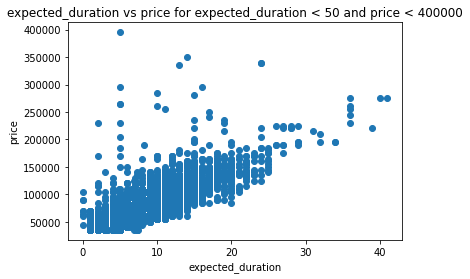

In [ ]:

# Create a list from price_new column values less than 400000
price_new2 = [i for i in price_new if i < 400000]
# Create a list from expected_duration_new which price is less than 400000
expected_duration_new2 = [expected_duration_new[i] for i in range(len(price_new)) if price_new[i] < 400000]
# scatter plot for expected_duration_new2 ,price_new2
plt.scatter(expected_duration_new2, price_new2)
plt.xlabel('expected_duration')
plt.ylabel('price')
plt.title('expected_duration vs price for expected_duration < 50 and price < 400000')
plt.show()

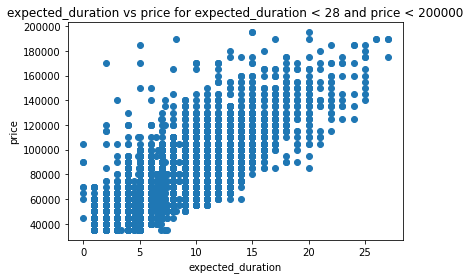

In [ ]:

# Create a list from price_new2 column values less than 200000
price_new3 = [i for i in price_new2 if i < 200000]
# Create a list from expected_duration_new2 which price is less than 200000
expected_duration_new3 = [expected_duration_new2[i] for i in range(len(price_new2)) if price_new2[i] < 200000]
# Create a list from expected_duration_new3 column values less than 28
expected_duration_new4 = [i for i in expected_duration_new3 if i < 28]
# Create a list from price_new3 which expected_duration is less than 28
price_new4 = [price_new3[i] for i in range(len(expected_duration_new3)) if expected_duration_new3[i] < 28]
# scatter plot for expected_duration_new4 ,price_new4
plt.scatter(expected_duration_new4, price_new4)
plt.xlabel('expected_duration')
plt.ylabel('price')
plt.title('expected_duration vs price for expected_duration < 28 and price < 200000')
plt.show()

In [ ]:
df7 = df2.copy()
# remove the rows with expected_duration > 28
df7 = df7[df7['expected_duration'] < 28]
# remove the rows with price > 200000
df7 = df7[df7['price'] < 200000]
print(df2.shape)
print(df7.shape)

(26768, 18)
(26703, 18)


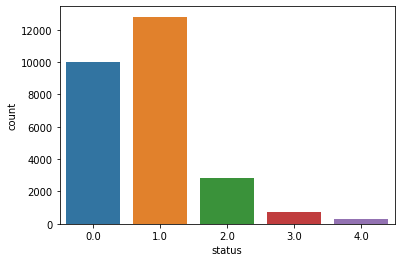

In [ ]:
# create a df8 with expected_duration,price,status
df8 = df7[['expected_duration', 'price', 'status']]
sns.countplot(x='status', data=df8)
plt.show()

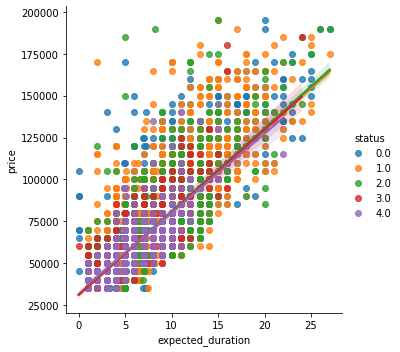

In [ ]:
# scatter plot for expected_duration ,price grouped by status
sns.lmplot(x='expected_duration', y='price', data=df8, hue='status', fit_reg=True)
plt.show()

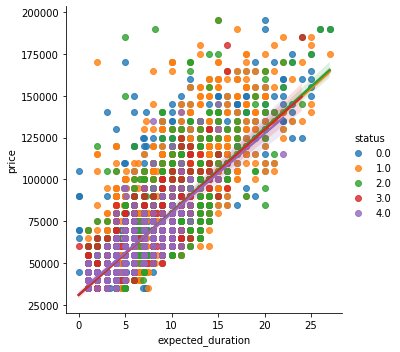

In [ ]:
sns.lmplot(x='expected_duration', y='price', data=df8, hue='status')

In [ ]:
# create a df8 with expected_duration,price,status
df8 = df7[['expected_duration', 'price', 'status']]
X = df8['expected_duration']
Y = df8['price']
# split test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Model2 - Linear Regression for expected_duration,price
from sklearn.linear_model import LinearRegression
model8 = LinearRegression()
model8.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
# print the intercept and coefficient
print('Intercept: ', model8.intercept_)
print('Coefficient: ', model8.coef_)

Intercept:  [30960.51772674]
Coefficient:  [[4972.89370709]]


In [ ]:
# number of rows with status = 1 in df8
print(df8[df8['status'] == 1].shape)
# number of rows with status = 5 in df8
print(df8[df8['status'] == 5].shape)

(12810, 3)
(0, 3)


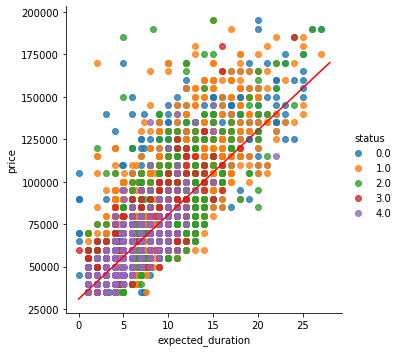

In [ ]:
# scatter plot for expected_duration ,price grouped by status
sns.lmplot(x='expected_duration', y='price', data=df8, hue='status', fit_reg=False)
# Draw a line with Intercept of 30997 and Coefficient of 4971
plt.plot([0, 28], [30997, 4971*28+30997], color='red')
plt.show()


In [ ]:
df9 = df8.copy()
df10 = df8.copy()
# df9 status = 1 and 2
df9 = df9[df9['status'] == 1]
df10 = df2.copy()
# df10 status = 3 and 4 and 5
df10 = df10[(df10['status'] == 3) | (df10['status'] == 4) | (df10['status'] == 0) | (df10['status'] == 2)]

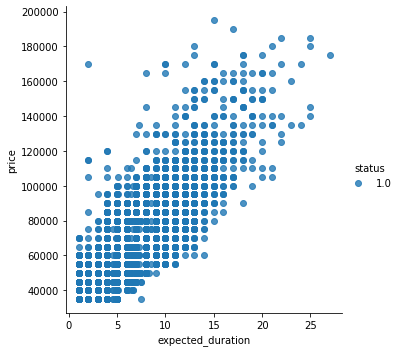

In [ ]:
sns.lmplot(x='expected_duration', y='price', data=df9, hue='status', fit_reg=False)
plt.show()

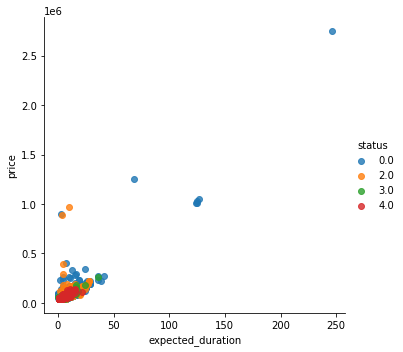

In [ ]:
sns.lmplot(x='expected_duration', y='price', data=df10, hue='status', fit_reg=False)
plt.show()

In [ ]:
#create OD matrix for Q2 (check price)
OD1 = clean_df.pivot_table(values='destination', index=clean_df["origin"],  columns = clean_df["destination"], fill_value=0, aggfunc=len)

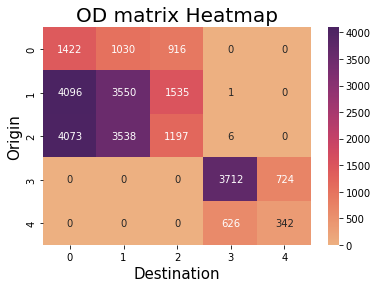

In [ ]:
#plot OD1 matrix by a hitmap
ax = sns.heatmap(OD1, cmap="flare", annot = True, fmt='g')
plt.title('OD matrix Heatmap', fontsize =20) #for all requested trips
plt.xlabel('Destination', fontsize = 15) 
plt.ylabel('Origin', fontsize = 15) 

plt.show()




In [ ]:
#create OD matrix for Q3 (request)
clean_dff = clean_df[clean_df.status == 1.0] #done trip OD matrix 
OD2 = clean_dff.pivot_table(values='destination', index=clean_dff["origin"], columns = clean_dff["destination"],  fill_value=0, aggfunc=len)

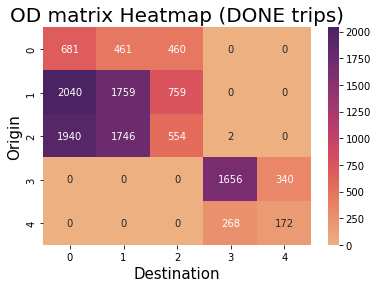

In [ ]:
#plot OD2 matrix by a hitmap
ax2 = sns.heatmap(OD2, cmap="flare", annot = True, fmt='g')
plt.title('OD matrix Heatmap (DONE trips)', fontsize =20) 
plt.xlabel('Destination', fontsize = 15) 
plt.ylabel('Origin', fontsize = 15) 

plt.show()

In [ ]:
a = (OD1-OD2)*100
b = (OD1.sum()).sum()
d = ((a/b).sum()).sum()
dd = round(d,2)  # total unhappend trips in percentage
print(dd,'% of all requested trips didnt happend')
c = round((a/b),2)
#print(c)
cc = (c.max()).max() # maximum unhappend trips from an origin to a destination in percentage
c2 = round((a/OD1),2)
cc2 = (c2.max()).max()
#c2 = c2.to_string(na_rep=0)
#print(c2)

52.04 % of all requested trips didnt happend


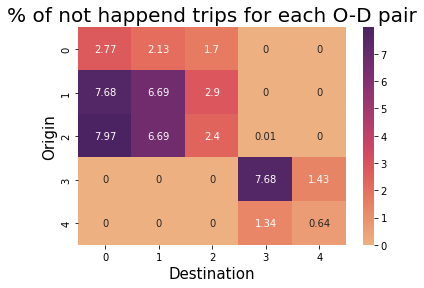

In [ ]:
ax3 = sns.heatmap(c, cmap="flare", annot = True, fmt='g')
plt.title('% of not happend trips for each O-D pair', fontsize =20) #compared to All 
plt.xlabel('Destination', fontsize = 15) 
plt.ylabel('Origin', fontsize = 15) 

plt.show()

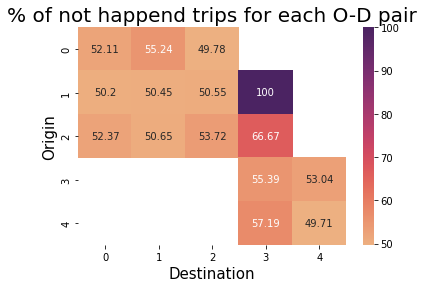

In [ ]:
ax4 = sns.heatmap(c2, cmap="flare", annot = True, fmt='g')
plt.title('% of not happend trips for each O-D pair', fontsize =20) #compared to themselves 
plt.xlabel('Destination', fontsize = 15) 
plt.ylabel('Origin', fontsize = 15) 
plt.show()

In [ ]:
# There can be two scenarios, which both are considered below:
for i in range (len(c)):
  for j in range (len(c)):
    if c.iloc[i][j]==cc:
      print('maximum unhappend trips are from origin',i,'to destination',j)

for i in range (len(c2)):
  for j in range (len(c2)):
    if c2.iloc[i][j]==cc2:
      print('maximum unhappend trips are from origin',i,'to destination',j)

maximum unhappend trips are from origin 2 to destination 0
maximum unhappend trips are from origin 1 to destination 3


In [ ]:
import plotly.graph_objects as go

In [ ]:
# Splitting time coln for ease of use
df[['price_check_date', 'price_check_hour']] = data.price_check_time.str.split(' ', expand=True)
df[['price_check_hour', 'price_check_min']] = df.price_check_hour.str.split(':', expand=True)

# Function for pivoting dataframe into trips per hour
def hourlyTrips(data):
    hourly_trips = data.pivot_table(values='price_check_min', index=data['price_check_hour'], aggfunc=len)
    hourly_trips['freq'] = pd.to_numeric(hourly_trips['price_check_min'])
    hourly_trips['theta'] = hourly_trips.index
    hourly_trips['hourInt'] = pd.to_numeric(hourly_trips.index)
    hourly_trips = hourly_trips.sort_values(by='hourInt')
    del hourly_trips['hourInt']
    del hourly_trips['price_check_min']

    return hourly_trips

hourlyReqAll = hourlyTrips(df)
hourlyReqForDriverAll = hourlyTrips(df[df.status <= 4])
hourlyReqAll['driveReq'] = hourlyReqForDriverAll['freq']
hourlyReqAll.head()

freq theta  driveReq
price_check_hour                      
0                  503     0       315
1                  184     1       116
2                  130     2        82
3                   70     3        43
4                   69     4        45

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=hourlyReqAll.freq, theta=hourlyReqAll.theta,
      fill='toself',
      name='All Requests for Price Check'))
fig.add_trace(go.Scatterpolar(
      r=hourlyReqAll.driveReq, theta=hourlyReqAll.theta,
      fill='toself',
      name='All requests for Getting a Driver'))
fig.update_layout(
  polar=dict(radialaxis=dict(visible=True)), showlegend=True)

fig.show()

In [ ]:
hourlyTripsByStatus = df.pivot_table(values="price_check_min", index=df['price_check_hour'], columns=df['status'], aggfunc=len)
hourlyTripsByStatus['theta'] = hourlyTripsByStatus.index
hourlyTripsByStatus['hourInt'] = pd.to_numeric(hourlyTripsByStatus.index)
hourlyTripsByStatus = hourlyTripsByStatus.sort_values(by='hourInt')
del hourlyTripsByStatus['hourInt']
hourlyTripsByStatus.head()

status              1.0   2.0   3.0  4.0 theta
price_check_hour                              
0                 234.0  59.0  14.0  8.0     0
1                  91.0  17.0   6.0  2.0     1
2                  55.0  20.0   5.0  2.0     2
3                  35.0   5.0   1.0  2.0     3
4                  42.0   3.0   NaN  NaN     4

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=hourlyTripsByStatus[1], theta=hourlyTripsByStatus.theta,
      fill='toself',
      name='Status 1'))
fig.add_trace(go.Scatterpolar(
      r=hourlyTripsByStatus[2], theta=hourlyTripsByStatus.theta,
      fill='toself',
      name='Status 2'))
fig.add_trace(go.Scatterpolar(
      r=hourlyTripsByStatus[3], theta=hourlyTripsByStatus.theta,
      fill='toself',
      name='Status 3'))
fig.add_trace(go.Scatterpolar(
      r=hourlyTripsByStatus[4], theta=hourlyTripsByStatus.theta,
      fill='toself',
      name='Status 4'))
fig.update_layout(
  polar=dict(radialaxis=dict(visible=True)), showlegend=True)

fig.show()

In [ ]:
clean_df

price_check_time  passenger  origin  destination  price  subsidy  \
0        1/4/2021 0:00          0       0            0  70000        0   
1       1/6/2021 12:11         10       0            0  60000    10000   
2       1/3/2021 20:15         15       0            0  65000    10000   
3       1/3/2021 20:11         15       0            0  75000    10000   
4       1/4/2021 14:46         22       0            0  75000    10000   
...                ...        ...     ...          ...    ...      ...   
26763   1/7/2021 10:19       3547       4            4  35000    10000   
26764   1/3/2021 16:26       4478       4            4  35000        0   
26765   1/6/2021 17:29       4333       4            4  45000    10000   
26766   1/4/2021 16:49       4594       4            4  60000    15000   
26767   1/5/2021 20:05       6062       4            4  35000    10000   

       distance  expected_duration        req_time  driver  status  
0        4174.0                8.0             NaN     NaN     NaN  
1        2851.0                8.0             NaN     NaN     NaN  
2        4386.0                8.0             NaN     NaN     NaN  
3        4488.0                9.0             NaN     NaN     NaN  
4        3683.0                8.0             NaN     NaN     NaN  
...         ...                ...             ...     ...     ...  
26763    1258.0                2.0  1/7/2021 10:21  1642.0     1.0  
26764     154.0                1.0  1/3/2021 16:34  1649.0     1.0  
26765    1088.0                3.0  1/6/2021 17:33  1676.0     1.0  
26766    2299.0                5.0  1/4/2021 16:50  1685.0     1.0  
26767    1717.0                5.0  1/5/2021 20:09  1728.0     1.0  

[26768 rows x 11 columns]

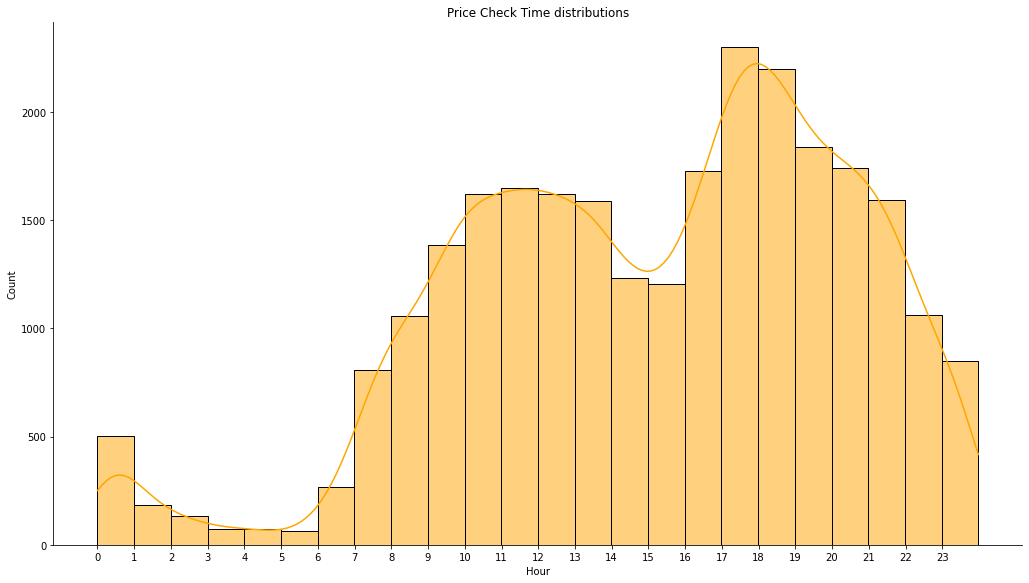

In [ ]:
#plot distribution of check price at each hour
sns.displot(data=clean_df, x="float_price_check_hour", kde=True, rug = False, height = 8,aspect = 1.8,bins=24,color = 'orange')
plt.xticks( np.arange(24),labels=np.arange(24))
plt.title("Price Check Time distributions")
plt.xlabel('Hour')
plt.show()


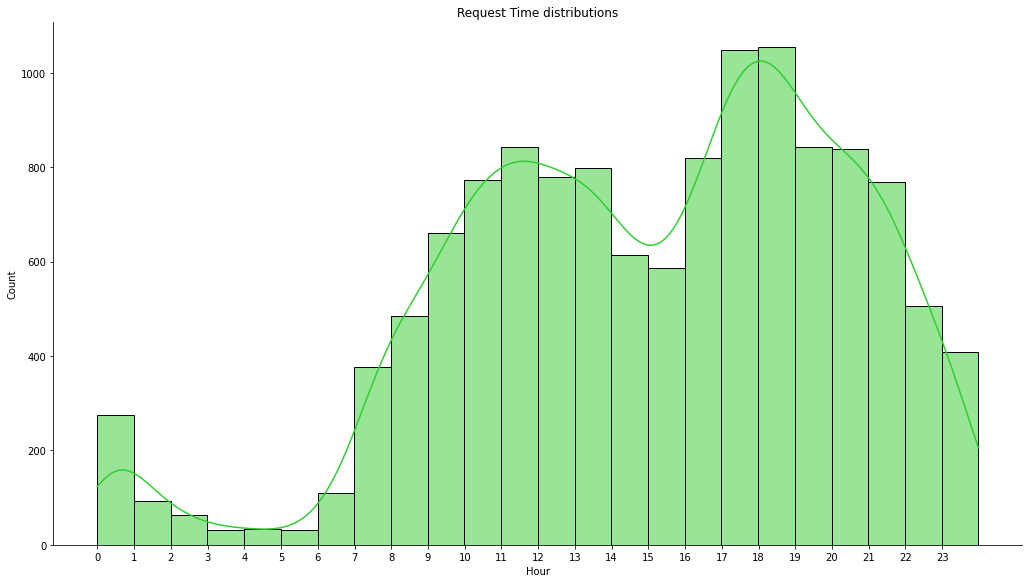

In [ ]:
#plot distribution of requests at each hour
sns.displot(data=clean_df[clean_df.status ==1], x="float_req_hour", kde=True, rug = False, height = 8,aspect = 1.8,bins=24,color = 'limegreen')
plt.xticks( np.arange(24),labels=np.arange(24))
plt.title("Request Time distributions")
plt.xlabel('Hour')
plt.show()


In [ ]:
#get information of percentages of converting check price to request at each hour
number_of_hourly_check = clean_df.groupby('price_check_hour').count().reset_index().rename(columns = {'price_check_hour':'hour','passenger' : 'total_count'})[['hour','total_count']]
number_of_hourly_req = clean_df[clean_df['status']==1].groupby('price_check_hour').count().reset_index().rename(columns = {'price_check_hour':'hour','passenger' : 'done_count'})[['hour','done_count']]
travel_done_percentage_df = number_of_hourly_check.merge(number_of_hourly_req)
travel_done_percentage_df['percentage'] = 100*travel_done_percentage_df['done_count']/travel_done_percentage_df['total_count']

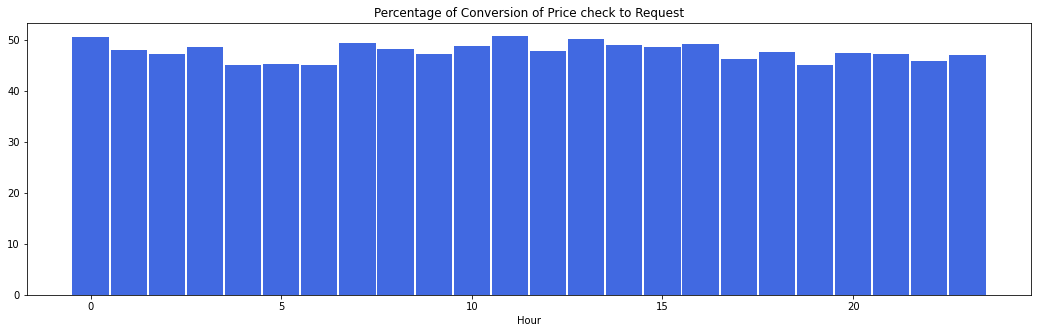

In [ ]:
#Plot Percentage of Conversion of Price check to Request by hour
f, ax = plt.subplots(figsize=(18,5))
plt.bar(travel_done_percentage_df.hour, travel_done_percentage_df.percentage, color ='royalblue',width = 0.95)
plt.title("Percentage of Conversion of Price check to Request")
plt.xlabel('Hour')
plt.show()


In [ ]:

print(f'standard deviation of price in whole society equals: \t%.2f'%clean_df.price.std())
print(f'standard deviation of price in status=2 equals: \t%.2f'%clean_df[clean_df['status']==2].price.std())
print(f'standard deviation of price in status!=2 equals: \t%.2f'%clean_df[clean_df['status']!=2].price.std())

standard deviation of price in whole society equals: 	35103.39
standard deviation of price in status=2 equals: 	31902.86
standard deviation of price in status!=2 equals: 	35463.83


In [ ]:
#levene test to see if the standard deviation of two groups are equal or no
status2_levene = levene(clean_df[clean_df['status']==2].price,clean_df[clean_df['status']!=2].price)
print('p_value of levene test is %.2f so they dont have non-equal variances. \nthus we use standasd deviation of whole dataset for both samples.' %status2_levene.pvalue)




p_value of levene test is 0.66 so they dont have non-equal variances. 
thus we use standasd deviation of whole dataset for both samples.


In [ ]:

print(f'Averrage of price in whole society equals: \t%.2f'%clean_df.price.mean())
print(f'Averrage of price in status=2 equals: \t\t%.2f'%clean_df[clean_df['status']==2].price.mean())
print(f'Averrage of price in status!=2 equals: \t\t%.2f'%clean_df[clean_df['status']!=2].price.mean())

Averrage of price in whole society equals: 	61573.52
Averrage of price in status=2 equals: 		61974.61
Averrage of price in status!=2 equals: 		61525.99


In [ ]:
#t-student test to see if the average of two groups are equal or no 
status2_t = ttest_ind(clean_df[clean_df['status']==2].price, clean_df[clean_df['status']!=2].price, equal_var=True)
print('p_value of T-test is %.2f so they dont have non-equal means.' %status2_t.pvalue)


p_value of T-test is 0.52 so they dont have non-equal means.


In [ ]:

print(f'standard deviation of price in whole society equals: \t%.2f'%clean_df.price.std())
print(f'standard deviation of price in status=3 equals: \t%.2f'%clean_df[clean_df['status']==3].price.std())
print(f'standard deviation of price in status!=3 equals: \t%.2f'%clean_df[clean_df['status']!=3].price.std())

standard deviation of price in whole society equals: 	35103.39
standard deviation of price in status=3 equals: 	19857.20
standard deviation of price in status!=3 equals: 	35432.92


In [ ]:
#levene test to see if the standard deviation of two groups are equal or no
status3_levene = levene(clean_df[clean_df['status']==3].price,clean_df[clean_df['status']!=3].price)
print('p_value of levene test is %.2f so they dont have non-equal variances. \nthus we use standasd deviation of whole dataset for both samples.' %status3_levene.pvalue)



p_value of levene test is 0.28 so they dont have non-equal variances. 
thus we use standasd deviation of whole dataset for both samples.


In [ ]:

print(f'Averrage of price in whole society equals: \t%.2f'%clean_df.price.mean())
print(f'Averrage of price in status=3 equals: \t\t%.2f'%clean_df[clean_df['status']==3].price.mean())
print(f'Averrage of price in status!=3 equals: \t\t%.2f'%clean_df[clean_df['status']!=3].price.mean())

Averrage of price in whole society equals: 	61573.52
Averrage of price in status=3 equals: 		60504.84
Averrage of price in status!=3 equals: 		61603.19


In [ ]:
#t-student test to see if the average of two groups are equal or no 
status3_t = ttest_ind(clean_df[clean_df['status']==3].price, clean_df[clean_df['status']!=3].price, equal_var=True)
print('p_value of T-test is %.2f so they dont have non-equal means.' %status3_t.pvalue)


p_value of T-test is 0.41 so they dont have non-equal means.


In [ ]:
#get indexes of rows that has occured in peak hours
peak_index = ((clean_df.float_price_check_hour<=8)&(clean_df.float_price_check_hour>=6)|(clean_df.float_price_check_hour<=19)&(clean_df.float_price_check_hour>=16))

In [ ]:
# get parameters to create Z-score for Z proportion test
n_A = len(clean_df[peak_index])
n_B = len(clean_df[~peak_index])
p_A = len(clean_df[peak_index][clean_df.status == 3])/len(clean_df[peak_index])
p_B = len(clean_df[~peak_index][clean_df.status == 3])/len(clean_df[~peak_index])
p_tot = len(clean_df[clean_df.status == 3])/len(clean_df)
SE_p = (p_tot*(1-p_tot)*(1/n_A + 1/n_B))**0.5
print(f"p_A =\t%.4f\np_B =\t%.4f\np_tot =\t%.4f\nSE_p:\t%.4f" %(p_A,p_B,p_tot,SE_p))

p_A =	0.0276
p_B =	0.0268
p_tot =	0.0270
SE_p:	0.0022


In [ ]:
#Z proportion test and calculate p-value
Z = (p_A - p_B)/SE_p
p_value_peak_status3 = norm.sf(Z, loc=0, scale=1)*2
p_value_peak_status3
print('Z: %.4f' %Z)
print('p_value of Z-test is %.2f so they dont have non-equal means.' %p_value_peak_status3)


Z: 0.3737
p_value of Z-test is 0.71 so they dont have non-equal means.


In [ ]:
clean_df.columns

Index(['price_check_date', 'float_price_check_hour', 'price_check_hour',
       'price_check_time', 'passenger', 'origin', 'destination', 'price',
       'subsidy', 'price_after_subsidy', 'distance', 'expected_duration',
       'req_date', 'float_req_hour', 'req_hour', 'req_time', 'driver',
       'status'],
      dtype='object')

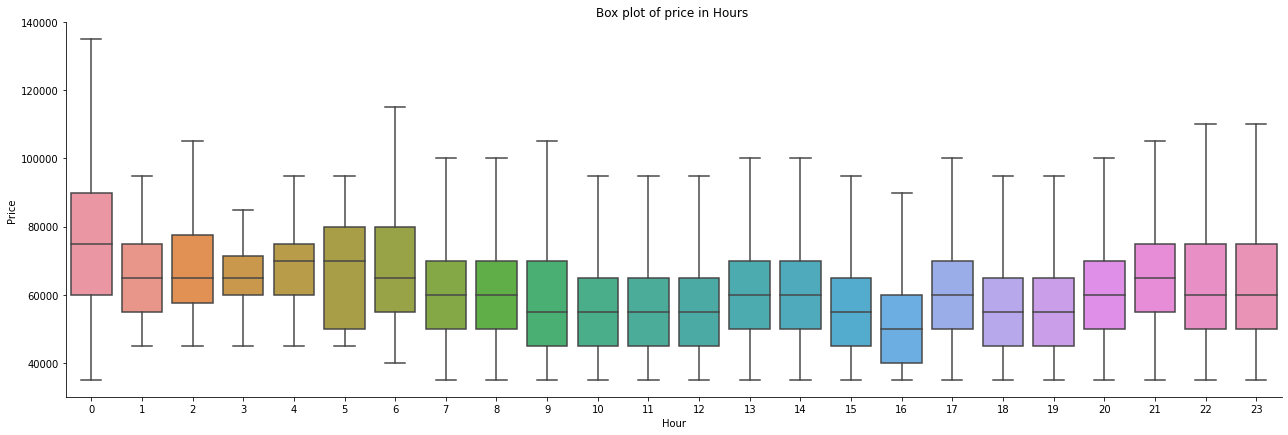

In [ ]:
sns.catplot(x="price_check_hour", y="price", kind="box", data=clean_df,showfliers=False, height=6, aspect=3)
plt.ylabel('Price')
plt.xlabel('Hour')
plt.title('Box plot of price in Hours ')
# plt.savefig('fig19.png')
plt.show()

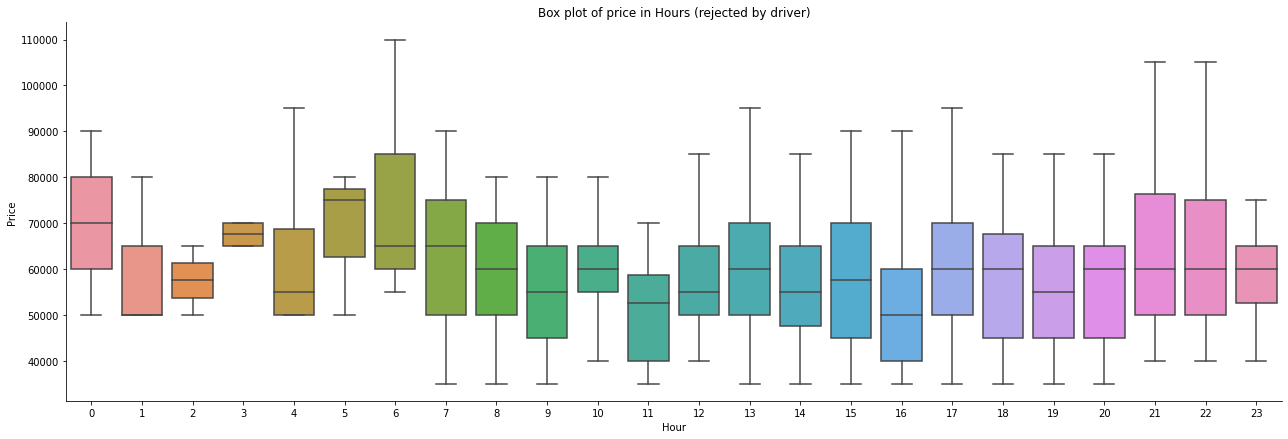

In [ ]:
sns.catplot(x="price_check_hour", y="price", kind="box", data=clean_df[clean_df.status == 3],showfliers=False, height=6, aspect=3)
plt.ylabel('Price')
plt.xlabel('Hour')
plt.title('Box plot of price in Hours (rejected by driver)')
# plt.savefig('fig19.png')
plt.show()

In [ ]:
#number of requests with status = 3 at each hour
clean_df[clean_df['status'] == 3].groupby('price_check_hour').count()[['price']]

price
price_check_hour       
0                    17
1                     3
2                     2
3                     4
4                     4
5                     3
6                     7
7                    33
8                    28
9                    42
10                   39
11                   30
12                   47
13                   42
14                   27
15                   22
16                   43
17                   54
18                   63
19                   74
20                   49
21                   40
22                   27
23                   23